<a href="https://colab.research.google.com/github/EliraAkimbaeva/boat_prices/blob/main/boat_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About the project

This project focuses on predicting boat prices using various machine learning algorithms. The dataset was sourced from Kaggle and involves
multiple steps, including data extraction, transformation, loading (ETL), cleaning, exploratory data analysis (EDA), and model building. The
primary objective is to develop and evaluate regression models to accurately predict boat prices based on various features.


# Importing the libraries

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cufflinks as cf
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode,plot, iplot

%matplotlib inline


# DATA EXTRACTION,TRANSFORM AND LOAD (ETL) AND EXPLORATORY

In [80]:
df = pd.read_csv('/Boats_Cleaned_dataset.csv')
df.head()

,Unnamed: 0,id,type,boatClass,make,model,year,condition,length_ft,beam_ft,...,minEngineYear,engineCategory,price,sellerId,city,state,zip,created_date,created_month,created_year
0,1,7252689,power,power-center,Aquasport,210 CC,1992,used,21.0,8.50,...,NaN,outboard-4s,16500.0,217053,Englewood,FL,34224,2019-10-16,10,2019
1,3,7228300,power,power-sportcruiser,Formula,400 Super Sport,2018,used,40.0,11.00,...,2018.0,inboard-outboard,539000.0,44260,Harsens Island,MI,48028,2019-09-24,9,2019
2,5,7271336,power,power-deck,Bayliner,Element 180,2020,new,18.0,7.42,...,2019.0,outboard-4s,26995.0,220570,Marietta,OH,45750,2019-11-02,11,2019
3,6,7222952,power,power-expresscruiser,Regal,32 Express,2015,used,32.0,10.33,...,NaN,multiple,169995.0,34834,North Charleston,SC,29405,2019-09-19,9,2019
4,8,6824832,power,power-aft,Carver,440 Aft Cabin Motor Yacht,1994,used,44.0,15.00,...,1994.0,inboard,109900.0,17942,Middle River,MD,21220,2018-08-29,8,2018


# DATA EXPLORATORY

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18903 entries, 0 to 18902
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      18903 non-null  int64  
 1   id              18903 non-null  int64  
 2   type            18903 non-null  object 
 3   boatClass       18903 non-null  object 
 4   make            18903 non-null  object 
 5   model           18868 non-null  object 
 6   year            18903 non-null  int64  
 7   condition       18903 non-null  object 
 8   length_ft       18903 non-null  float64
 9   beam_ft         12399 non-null  float64
 10  dryWeight_lb    7094 non-null   float64
 11  hullMaterial    18903 non-null  object 
 12  fuelType        15951 non-null  object 
 13  numEngines      18903 non-null  int64  
 14  totalHP         18055 non-null  float64
 15  maxEngineYear   2205 non-null   float64
 16  minEngineYear   2174 non-null   float64
 17  engineCategory  8410 non-null  

<Axes: >

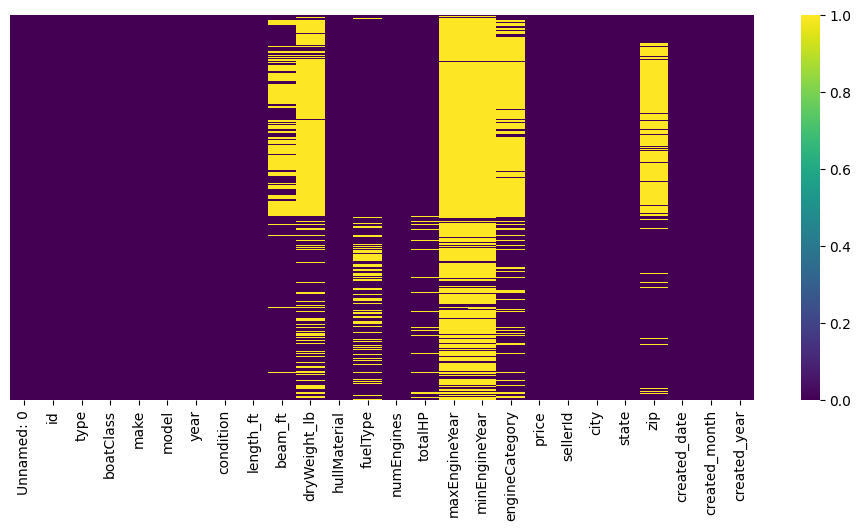

In [82]:
plt.figure(figsize=(12,5))
sns.heatmap(df.isnull(), yticklabels=False, cbar =True, cmap='viridis')


In [83]:
# CHECK ALL COLUMN
df.keys()


Index(['Unnamed: 0', 'id', 'type', 'boatClass', 'make', 'model', 'year',
       'condition', 'length_ft', 'beam_ft', 'dryWeight_lb', 'hullMaterial',
       'fuelType', 'numEngines', 'totalHP', 'maxEngineYear', 'minEngineYear',
       'engineCategory', 'price', 'sellerId', 'city', 'state', 'zip',
       'created_date', 'created_month', 'created_year'],
      dtype='object')

# DATA CLEANING AND PROCESSING

 DATA CLEANING

DROP 'Unnamed: 0', 'id', 'created_date', 'created_month' 'sellerId', 'year' AS IS OF NO USE

In [84]:
df.drop(['Unnamed: 0', 'id', 'created_date','created_month'], axis=1, inplace=True)
#df.drop(['Unnamed: 0', 'id', 'created_date','created_month', 'year', 'sellerId'], axis=1, inplace=True)
df.head()

,type,boatClass,make,model,year,condition,length_ft,beam_ft,dryWeight_lb,hullMaterial,...,totalHP,maxEngineYear,minEngineYear,engineCategory,price,sellerId,city,state,zip,created_year
0,power,power-center,Aquasport,210 CC,1992,used,21.0,8.50,3000.0,fiberglass,...,150.0,NaN,NaN,outboard-4s,16500.0,217053,Englewood,FL,34224,2019
1,power,power-sportcruiser,Formula,400 Super Sport,2018,used,40.0,11.00,16100.0,fiberglass,...,800.0,2018.0,2018.0,inboard-outboard,539000.0,44260,Harsens Island,MI,48028,2019
2,power,power-deck,Bayliner,Element 180,2020,new,18.0,7.42,2000.0,fiberglass,...,75.0,2019.0,2019.0,outboard-4s,26995.0,220570,Marietta,OH,45750,2019
3,power,power-expresscruiser,Regal,32 Express,2015,used,32.0,10.33,12650.0,fiberglass,...,600.0,NaN,NaN,multiple,169995.0,34834,North Charleston,SC,29405,2019
4,power,power-aft,Carver,440 Aft Cabin Motor Yacht,1994,used,44.0,15.00,32000.0,fiberglass,...,700.0,1994.0,1994.0,inboard,109900.0,17942,Middle River,MD,21220,2018


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18903 entries, 0 to 18902
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   type            18903 non-null  object 
 1   boatClass       18903 non-null  object 
 2   make            18903 non-null  object 
 3   model           18868 non-null  object 
 4   year            18903 non-null  int64  
 5   condition       18903 non-null  object 
 6   length_ft       18903 non-null  float64
 7   beam_ft         12399 non-null  float64
 8   dryWeight_lb    7094 non-null   float64
 9   hullMaterial    18903 non-null  object 
 10  fuelType        15951 non-null  object 
 11  numEngines      18903 non-null  int64  
 12  totalHP         18055 non-null  float64
 13  maxEngineYear   2205 non-null   float64
 14  minEngineYear   2174 non-null   float64
 15  engineCategory  8410 non-null   object 
 16  price           18903 non-null  float64
 17  sellerId        18903 non-null 

Display all Column with null value

In [86]:
cols_with_null = []
for col in df.keys():
  if df[col].isnull().any():
    cols_with_null.append(col)

df[cols_with_null]

,model,beam_ft,dryWeight_lb,fuelType,totalHP,maxEngineYear,minEngineYear,engineCategory,city,zip
0,210 CC,8.50,3000.0,gasoline,150.0,NaN,NaN,outboard-4s,Englewood,34224
1,400 Super Sport,11.00,16100.0,diesel,800.0,2018.0,2018.0,inboard-outboard,Harsens Island,48028
2,Element 180,7.42,2000.0,gasoline,75.0,2019.0,2019.0,outboard-4s,Marietta,45750
3,32 Express,10.33,12650.0,gasoline,600.0,NaN,NaN,multiple,North Charleston,29405
4,440 Aft Cabin Motor Yacht,15.00,32000.0,diesel,700.0,1994.0,1994.0,inboard,Middle River,21220
...,...,...,...,...,...,...,...,...,...,...
18898,250 Play,8.50,NaN,gasoline,NaN,NaN,NaN,NaN,Acworth,30102
18899,Captiva 200 MTX,8.00,2795.0,gasoline,0.0,NaN,NaN,NaN,New Baltimore,48047
18900,2200,7.67,NaN,gasoline,NaN,NaN,NaN,NaN,Seabrook,77586
18901,250,8.50,NaN,gasoline,NaN,NaN,NaN,NaN,Sunrise Beach,65079


<Axes: >

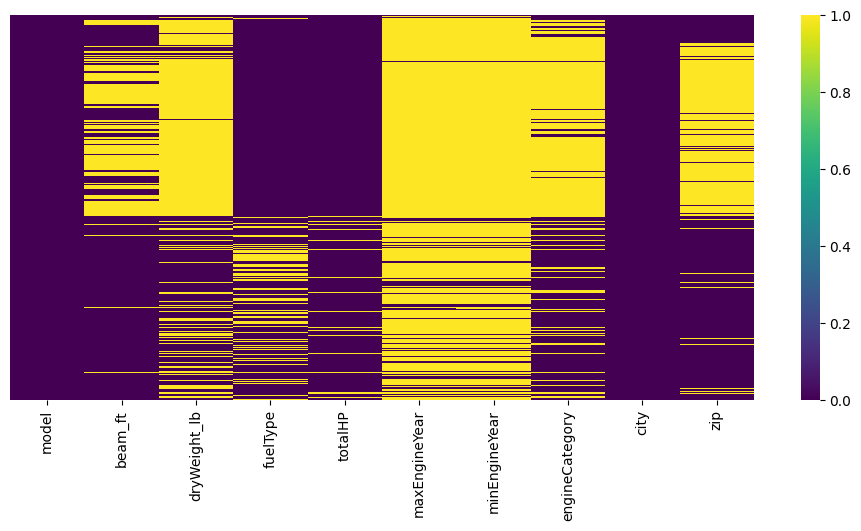

In [87]:
plt.figure(figsize=(12,5))
sns.heatmap(df[cols_with_null].isnull(), yticklabels=False, cbar =True, cmap='viridis')


## ADVANCE DATA CLEANING

FOR OBJECT DATA TYPE

 - DROP COLUMN WITH ATMOST 100 Unique Value
 - IF MISSING VALUE IS LESS THAN 3000, REMOVE THE MISSING VALUE ELSE DROP THE COLUMN

FOR NUMERIC DATA TYPE

 - IF MISSING VALUE IS UP TO 1000 IN A NUMERIC TYPE COLUMN, DROP THE COLUMN
 - REMOVE ROW WITH MISSING VALUE FOR NUMERIC TYPE


### FOR OBJECT DATA TYPE

>>> DROP COLUMN WITH ATMOST 100 Unique Value


In [88]:
# CHECK FOR COLUMN OBJECT DT
df_to_drop_col_objType = []
print()
print('+ DROP COLUMN WITH 99 || > unique Value: i.e')
for col in df:
  if df[col].dtypes == 'object' and len(df[col].unique()) >99:
    df_to_drop_col_objType.append(col)

for col in df_to_drop_col_objType:
  print(col, end=' --> consists ')
  print(f'`{len(df[col].unique())}` unique value')



+ DROP COLUMN WITH 99 || > unique Value: i.e
make --> consists `960` unique value
model --> consists `7900` unique value
city --> consists `1150` unique value
zip --> consists `1047` unique value


+ DROP COLUMN WITH 99 || > unique Value: i.e
make --> consists `960` unique value
model --> consists `7900` unique value
city --> consists `1150` unique value
zip --> consists `1047` unique value

make      960
model    7899
city     1149
zip      1046
dtype: int64


<Axes: >

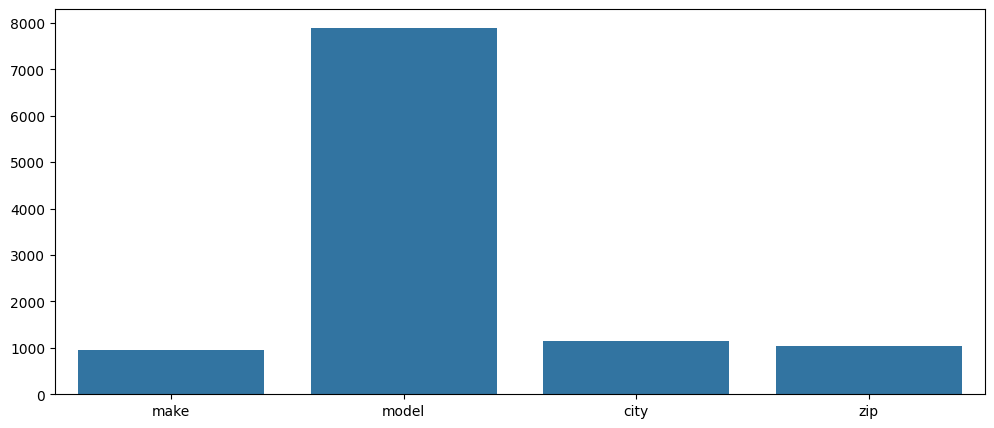

In [89]:
plt.figure(figsize=(12,5))
print(df[df_to_drop_col_objType].nunique())
sns.barplot(x=df_to_drop_col_objType, y=df[df_to_drop_col_objType].nunique().values)


In [90]:
print('DROP ', df_to_drop_col_objType)
df_clean = df.drop(df_to_drop_col_objType, axis=1)
df_clean


DROP  ['make', 'model', 'city', 'zip']


,type,boatClass,year,condition,length_ft,beam_ft,dryWeight_lb,hullMaterial,fuelType,numEngines,totalHP,maxEngineYear,minEngineYear,engineCategory,price,sellerId,state,created_year
0,power,power-center,1992,used,21.00,8.50,3000.0,fiberglass,gasoline,1,150.0,NaN,NaN,outboard-4s,16500.0,217053,FL,2019
1,power,power-sportcruiser,2018,used,40.00,11.00,16100.0,fiberglass,diesel,2,800.0,2018.0,2018.0,inboard-outboard,539000.0,44260,MI,2019
2,power,power-deck,2020,new,18.00,7.42,2000.0,fiberglass,gasoline,1,75.0,2019.0,2019.0,outboard-4s,26995.0,220570,OH,2019
3,power,power-expresscruiser,2015,used,32.00,10.33,12650.0,fiberglass,gasoline,2,600.0,NaN,NaN,multiple,169995.0,34834,SC,2019
4,power,power-aft,1994,used,44.00,15.00,32000.0,fiberglass,diesel,2,700.0,1994.0,1994.0,inboard,109900.0,17942,MD,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18898,power,power-pontoon,2013,used,25.00,8.50,NaN,aluminum,gasoline,0,NaN,NaN,NaN,NaN,31973.0,34647,GA,2019
18899,power,power-runabout,2013,used,19.33,8.00,2795.0,fiberglass,gasoline,1,0.0,NaN,NaN,NaN,26995.0,6335,MI,2019
18900,power,power-bay,2019,new,22.00,7.67,NaN,fiberglass,gasoline,0,NaN,NaN,NaN,NaN,39995.0,65602,TX,2018
18901,power,power-pontoon,2004,used,25.00,8.50,NaN,aluminum,gasoline,0,NaN,NaN,NaN,NaN,16900.0,3180,MO,2019


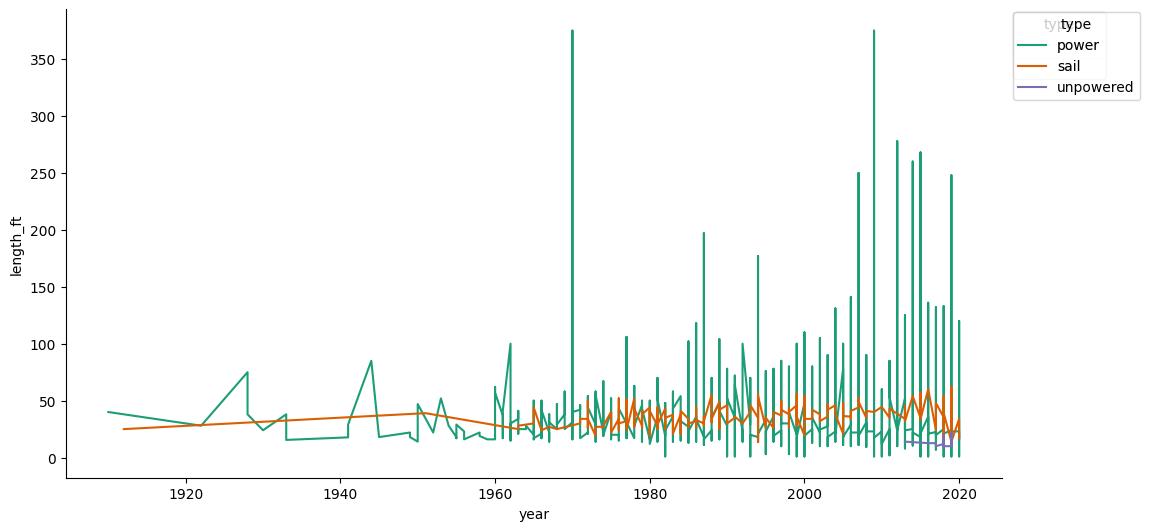

In [91]:
# @title year vs length_ft

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['length_ft']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_clean.sort_values('year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('type')):
  _plot_series(series, series_name, i)
  fig.legend(title='type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('length_ft')

 IF MISSING VALUE IS LESS THAN 3000, (FILL WITH MOST FREQUENT VALUE) ELSE DROP THE COLUMN FOR OBJECT DT

In [92]:
# Check object data-type column(s) with missing value
df_nan_obj_col = []
for col in df_clean:
  if df_clean[col].dtypes == 'object' and df_clean[col].isnull().any():
    df_nan_obj_col.append(col)
    print(col.upper())
    print(df_clean[col].isnull().value_counts())
    print()

FUELTYPE
fuelType
False    15951
True      2952
Name: count, dtype: int64

ENGINECATEGORY
engineCategory
True     10493
False     8410
Name: count, dtype: int64



<Axes: >

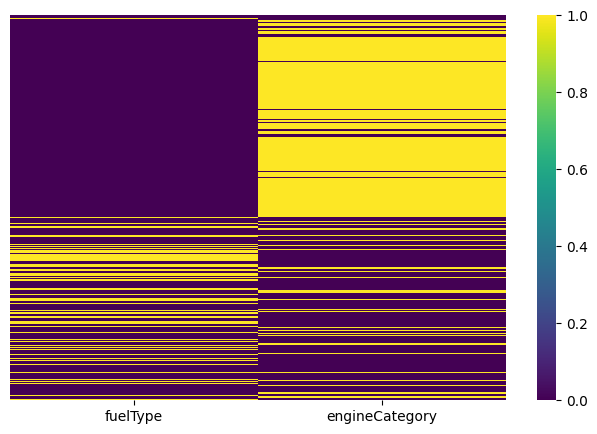

In [93]:
plt.figure(figsize=(8,5))
sns.heatmap(df_clean[df_nan_obj_col].isnull(), yticklabels=False, cbar =True, cmap='viridis')


In [94]:
# CHECK MISSING Value for 1st OBJECT(FuelType)
print('Missing Value in ',df_nan_obj_col[0], len(df_clean[df_clean[df_nan_obj_col[0]].isnull()]))
print(df_clean[df_nan_obj_col[0]].unique())
df_clean[df_clean[df_nan_obj_col[0]].isnull()].sample(10)


Missing Value in  fuelType 2952
['gasoline' 'diesel' nan 'other' 'electric']


,type,boatClass,year,condition,length_ft,beam_ft,dryWeight_lb,hullMaterial,fuelType,numEngines,totalHP,maxEngineYear,minEngineYear,engineCategory,price,sellerId,state,created_year
15915,power,power-fresh,2019,new,16.50,7.33,1169.0,aluminum,NaN,1,60.0,NaN,NaN,outboard,18645.0,1215,KY,2019
12389,power,power-aluminum,2019,new,19.00,8.50,2001.0,aluminum,NaN,1,200.0,NaN,NaN,outboard,44995.0,155637,WI,2019
11318,power,power-jon,2019,new,13.83,4.42,162.0,aluminum,NaN,1,0.0,NaN,NaN,outboard,919.0,1153,WI,2018
14527,power,power-jon,2019,new,19.50,7.00,1440.0,aluminum,NaN,1,90.0,NaN,NaN,outboard,25340.0,1029,SC,2019
18581,power,power-pontoon,2019,new,16.00,7.08,1175.0,aluminum,NaN,1,40.0,NaN,NaN,outboard,20240.0,1248,CA,2018
12140,power,power-bay,2018,new,18.50,7.58,1752.0,fiberglass,NaN,1,90.0,NaN,NaN,outboard,27635.0,62407,AL,2017
16594,power,power-pontoon,2019,new,27.42,8.50,3432.0,aluminum,NaN,1,300.0,NaN,NaN,outboard,66585.0,40861,CA,2019
11820,power,power-jon,2019,new,17.33,6.50,744.0,aluminum,NaN,1,40.0,NaN,NaN,outboard-4s,14165.0,1107,NC,2018
13728,power,power-jon,2019,new,17.08,6.50,670.0,aluminum,NaN,1,0.0,NaN,NaN,outboard,4330.0,1509,LA,2019
12415,power,power-pontoon,2019,new,20.00,8.17,1495.0,aluminum,NaN,1,60.0,NaN,NaN,outboard,21915.0,1041,LA,2018


In [95]:
# Fill the missing values with the mode (most frequent value) of the column

mode_fuelType = df_clean['fuelType'].mode()[0] # Calculate the mode of fuelType
df_clean['fuelType'].fillna(mode_fuelType, inplace=True) # Fill missing values with the mode
df_clean

,type,boatClass,year,condition,length_ft,beam_ft,dryWeight_lb,hullMaterial,fuelType,numEngines,totalHP,maxEngineYear,minEngineYear,engineCategory,price,sellerId,state,created_year
0,power,power-center,1992,used,21.00,8.50,3000.0,fiberglass,gasoline,1,150.0,NaN,NaN,outboard-4s,16500.0,217053,FL,2019
1,power,power-sportcruiser,2018,used,40.00,11.00,16100.0,fiberglass,diesel,2,800.0,2018.0,2018.0,inboard-outboard,539000.0,44260,MI,2019
2,power,power-deck,2020,new,18.00,7.42,2000.0,fiberglass,gasoline,1,75.0,2019.0,2019.0,outboard-4s,26995.0,220570,OH,2019
3,power,power-expresscruiser,2015,used,32.00,10.33,12650.0,fiberglass,gasoline,2,600.0,NaN,NaN,multiple,169995.0,34834,SC,2019
4,power,power-aft,1994,used,44.00,15.00,32000.0,fiberglass,diesel,2,700.0,1994.0,1994.0,inboard,109900.0,17942,MD,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18898,power,power-pontoon,2013,used,25.00,8.50,NaN,aluminum,gasoline,0,NaN,NaN,NaN,NaN,31973.0,34647,GA,2019
18899,power,power-runabout,2013,used,19.33,8.00,2795.0,fiberglass,gasoline,1,0.0,NaN,NaN,NaN,26995.0,6335,MI,2019
18900,power,power-bay,2019,new,22.00,7.67,NaN,fiberglass,gasoline,0,NaN,NaN,NaN,NaN,39995.0,65602,TX,2018
18901,power,power-pontoon,2004,used,25.00,8.50,NaN,aluminum,gasoline,0,NaN,NaN,NaN,NaN,16900.0,3180,MO,2019


<Axes: >

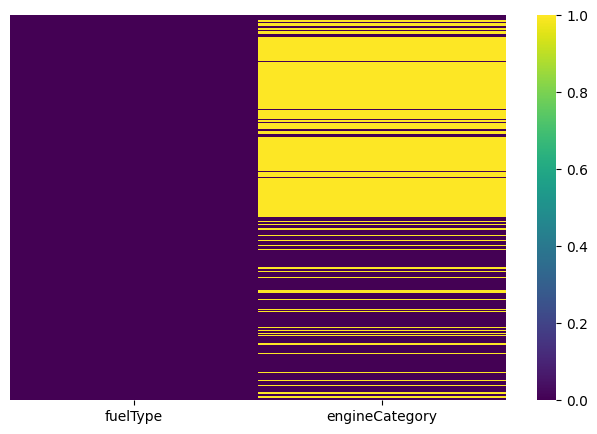

In [96]:
plt.figure(figsize=(8,5))
sns.heatmap(df_clean[df_nan_obj_col].isnull(), yticklabels=False, cbar =True, cmap='viridis')


In [97]:
# CHECK NaN Value FOR 2ND OBJECT data-type COLUMN with MISSING Value

print('NaN Value in ',df_nan_obj_col[1], len(df_clean[df_clean[df_nan_obj_col[1]].isnull()]))
print(df_clean[df_nan_obj_col[1]].unique())
df_clean[df_clean[df_nan_obj_col[1]].isnull()].sample(10)

NaN Value in  engineCategory 10493
['outboard-4s' 'inboard-outboard' 'multiple' 'inboard' nan 'outboard'
 'outboard-2s' 'other' 'v-drive' 'electric']


,type,boatClass,year,condition,length_ft,beam_ft,dryWeight_lb,hullMaterial,fuelType,numEngines,totalHP,maxEngineYear,minEngineYear,engineCategory,price,sellerId,state,created_year
6230,power,power-pontoon,2013,used,20.0,NaN,NaN,other,other,1,0.0,NaN,NaN,NaN,16500.0,34959,LA,2019
7390,power,power-pontoon,2019,new,23.0,NaN,NaN,other,other,1,0.0,NaN,NaN,NaN,34500.0,34588,TN,2018
3297,power,power-sportfish,2018,new,18.0,NaN,NaN,other,other,1,0.0,NaN,NaN,NaN,49995.0,5080,NH,2019
5254,power,power-pontoon,2018,new,23.0,NaN,NaN,other,other,1,0.0,NaN,NaN,NaN,28990.0,57268,GA,2019
2407,power,power-pwc,2019,new,120.0,NaN,NaN,other,other,1,0.0,NaN,NaN,NaN,7999.0,46516,MN,2019
5017,power,power-highperf,2004,used,50.0,9.0,NaN,fiberglass,other,1,0.0,NaN,NaN,NaN,159900.0,5092,FL,2015
2610,power,power-pontoon,2020,new,27.0,NaN,NaN,other,other,1,0.0,NaN,NaN,NaN,108259.0,46516,MN,2019
5948,power,power-pontoon,2019,new,18.0,NaN,NaN,other,other,1,0.0,NaN,NaN,NaN,19036.0,263179,MI,2019
9025,power,power-pontoon,2019,new,23.0,86.0,NaN,aluminum,other,1,0.0,NaN,NaN,NaN,47998.0,34996,GA,2019
8307,power,power-pontoon,2019,new,20.0,NaN,NaN,other,other,1,0.0,NaN,NaN,NaN,26900.0,5365,NC,2018


The missing Data is greater than the half of the dataset


 Drop to avoid data misleading


In [98]:
# DROP COLUMN

print(df_nan_obj_col[1])
df_clean = df_clean.drop([df_nan_obj_col[1]], axis=1)
df_clean


engineCategory


,type,boatClass,year,condition,length_ft,beam_ft,dryWeight_lb,hullMaterial,fuelType,numEngines,totalHP,maxEngineYear,minEngineYear,price,sellerId,state,created_year
0,power,power-center,1992,used,21.00,8.50,3000.0,fiberglass,gasoline,1,150.0,NaN,NaN,16500.0,217053,FL,2019
1,power,power-sportcruiser,2018,used,40.00,11.00,16100.0,fiberglass,diesel,2,800.0,2018.0,2018.0,539000.0,44260,MI,2019
2,power,power-deck,2020,new,18.00,7.42,2000.0,fiberglass,gasoline,1,75.0,2019.0,2019.0,26995.0,220570,OH,2019
3,power,power-expresscruiser,2015,used,32.00,10.33,12650.0,fiberglass,gasoline,2,600.0,NaN,NaN,169995.0,34834,SC,2019
4,power,power-aft,1994,used,44.00,15.00,32000.0,fiberglass,diesel,2,700.0,1994.0,1994.0,109900.0,17942,MD,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18898,power,power-pontoon,2013,used,25.00,8.50,NaN,aluminum,gasoline,0,NaN,NaN,NaN,31973.0,34647,GA,2019
18899,power,power-runabout,2013,used,19.33,8.00,2795.0,fiberglass,gasoline,1,0.0,NaN,NaN,26995.0,6335,MI,2019
18900,power,power-bay,2019,new,22.00,7.67,NaN,fiberglass,gasoline,0,NaN,NaN,NaN,39995.0,65602,TX,2018
18901,power,power-pontoon,2004,used,25.00,8.50,NaN,aluminum,gasoline,0,NaN,NaN,NaN,16900.0,3180,MO,2019


<Axes: >

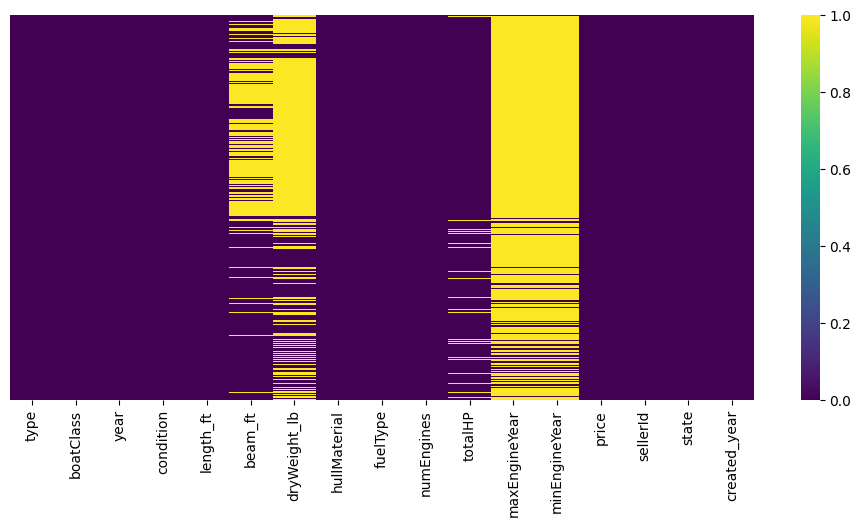

In [99]:
# Preview the missing Column
plt.figure(figsize=(12,5))
sns.heatmap(df_clean.isnull(), yticklabels=False, cbar =True, cmap='viridis')

### FOR NUMERIC DATA TYPE

IF MISSING VALUE IS UP TO 1000 IN A NUMERIC TYPE COLUMN, DROP THE COLUMN

In [100]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18903 entries, 0 to 18902
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   type           18903 non-null  object 
 1   boatClass      18903 non-null  object 
 2   year           18903 non-null  int64  
 3   condition      18903 non-null  object 
 4   length_ft      18903 non-null  float64
 5   beam_ft        12399 non-null  float64
 6   dryWeight_lb   7094 non-null   float64
 7   hullMaterial   18903 non-null  object 
 8   fuelType       18903 non-null  object 
 9   numEngines     18903 non-null  int64  
 10  totalHP        18055 non-null  float64
 11  maxEngineYear  2205 non-null   float64
 12  minEngineYear  2174 non-null   float64
 13  price          18903 non-null  float64
 14  sellerId       18903 non-null  int64  
 15  state          18903 non-null  object 
 16  created_year   18903 non-null  int64  
dtypes: float64(7), int64(4), object(6)
memory usage: 2

In [101]:
# Check `int` or `Float` data-type column(s) with missing value
df_nan_num_col = []
for col in df_clean:
  if (df_clean[col].dtypes == 'float64' or df_clean[col].dtypes == 'int64') and df_clean[col].isnull().any():
    df_nan_num_col.append(col)
    print(col.upper())
    print(df_clean[col].isnull().value_counts())
    print()


BEAM_FT
beam_ft
False    12399
True      6504
Name: count, dtype: int64

DRYWEIGHT_LB
dryWeight_lb
True     11809
False     7094
Name: count, dtype: int64

TOTALHP
totalHP
False    18055
True       848
Name: count, dtype: int64

MAXENGINEYEAR
maxEngineYear
True     16698
False     2205
Name: count, dtype: int64

MINENGINEYEAR
minEngineYear
True     16729
False     2174
Name: count, dtype: int64



<Axes: >

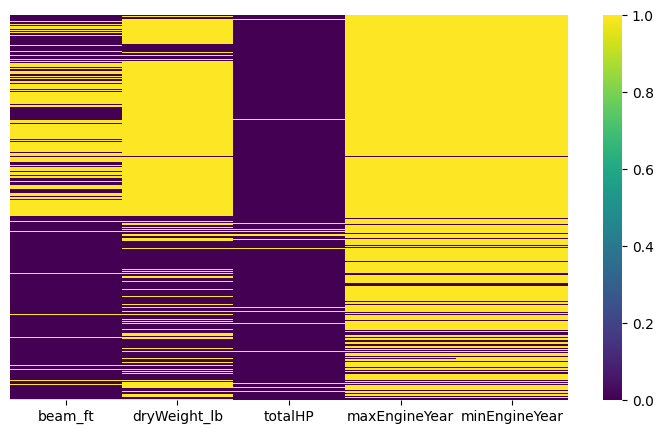

In [102]:
# VISUAL COLUMN WITH MISSING VALUE (in NUMERKIC TYPE)
plt.figure(figsize=(9,5))
sns.heatmap(df[df_nan_num_col].isnull(), yticklabels=False, cbar =True, cmap='viridis')


In [103]:
# EXCLUDE COLUMN THAT DOES NOT HAVE UPTO 1,000 MISSING VALUE
df_nan_to_drop_num_col = [col for col in df_nan_num_col if col != 'totalHP']
df_nan_to_drop_num_col

['beam_ft', 'dryWeight_lb', 'maxEngineYear', 'minEngineYear']

In [104]:
# DROP COLUMN THAT HAVE MORE THAN 1,000 MISSING VALUE
print('DROP ', df_nan_to_drop_num_col)
df_clean = df_clean.drop(df_nan_to_drop_num_col, axis=1)
#df_clean.drop(df_nan_num_col, axis=1, inplace=True)
df_clean

DROP  ['beam_ft', 'dryWeight_lb', 'maxEngineYear', 'minEngineYear']


,type,boatClass,year,condition,length_ft,hullMaterial,fuelType,numEngines,totalHP,price,sellerId,state,created_year
0,power,power-center,1992,used,21.00,fiberglass,gasoline,1,150.0,16500.0,217053,FL,2019
1,power,power-sportcruiser,2018,used,40.00,fiberglass,diesel,2,800.0,539000.0,44260,MI,2019
2,power,power-deck,2020,new,18.00,fiberglass,gasoline,1,75.0,26995.0,220570,OH,2019
3,power,power-expresscruiser,2015,used,32.00,fiberglass,gasoline,2,600.0,169995.0,34834,SC,2019
4,power,power-aft,1994,used,44.00,fiberglass,diesel,2,700.0,109900.0,17942,MD,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18898,power,power-pontoon,2013,used,25.00,aluminum,gasoline,0,NaN,31973.0,34647,GA,2019
18899,power,power-runabout,2013,used,19.33,fiberglass,gasoline,1,0.0,26995.0,6335,MI,2019
18900,power,power-bay,2019,new,22.00,fiberglass,gasoline,0,NaN,39995.0,65602,TX,2018
18901,power,power-pontoon,2004,used,25.00,aluminum,gasoline,0,NaN,16900.0,3180,MO,2019


In [105]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18903 entries, 0 to 18902
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          18903 non-null  object 
 1   boatClass     18903 non-null  object 
 2   year          18903 non-null  int64  
 3   condition     18903 non-null  object 
 4   length_ft     18903 non-null  float64
 5   hullMaterial  18903 non-null  object 
 6   fuelType      18903 non-null  object 
 7   numEngines    18903 non-null  int64  
 8   totalHP       18055 non-null  float64
 9   price         18903 non-null  float64
 10  sellerId      18903 non-null  int64  
 11  state         18903 non-null  object 
 12  created_year  18903 non-null  int64  
dtypes: float64(3), int64(4), object(6)
memory usage: 1.9+ MB


IF MISSING VALUE IS LESS THAN 1000 IN A NUMERIC TYPE COLUMN, REMOVE NaN ROW

In [106]:
df_clean = df_clean[df_clean['totalHP'].notnull()]
df_clean

,type,boatClass,year,condition,length_ft,hullMaterial,fuelType,numEngines,totalHP,price,sellerId,state,created_year
0,power,power-center,1992,used,21.00,fiberglass,gasoline,1,150.0,16500.0,217053,FL,2019
1,power,power-sportcruiser,2018,used,40.00,fiberglass,diesel,2,800.0,539000.0,44260,MI,2019
2,power,power-deck,2020,new,18.00,fiberglass,gasoline,1,75.0,26995.0,220570,OH,2019
3,power,power-expresscruiser,2015,used,32.00,fiberglass,gasoline,2,600.0,169995.0,34834,SC,2019
4,power,power-aft,1994,used,44.00,fiberglass,diesel,2,700.0,109900.0,17942,MD,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18895,power,power-house,2005,used,100.00,aluminum,gasoline,2,0.0,425000.0,34888,KY,2018
18896,power,power-center,1990,used,28.00,fiberglass,diesel,1,315.0,49000.0,61420,FL,2019
18897,power,power-pilot,1973,used,29.00,other,gasoline,1,0.0,10000.0,32168,GA,2017
18899,power,power-runabout,2013,used,19.33,fiberglass,gasoline,1,0.0,26995.0,6335,MI,2019


<Axes: >

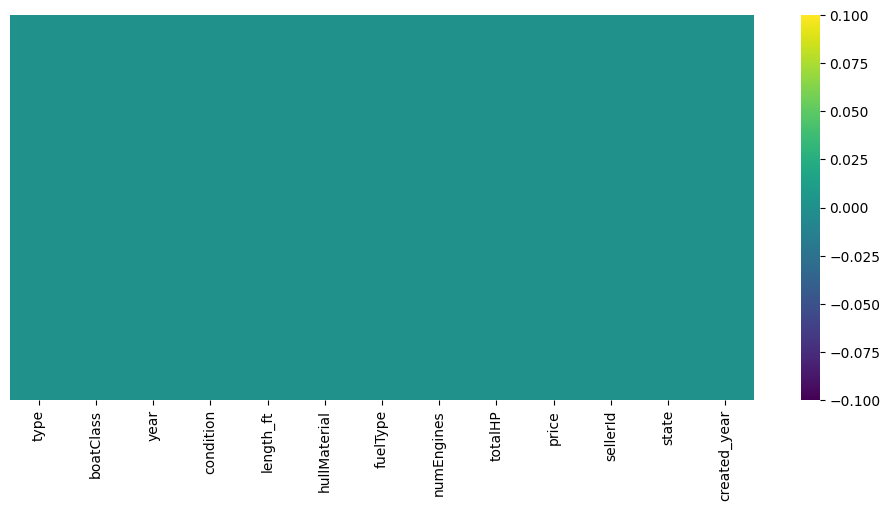

In [107]:
plt.figure(figsize=(12,5))
sns.heatmap(df_clean.isnull(), yticklabels=False, cbar =True, cmap='viridis')


# EXPLORATORY DATA ANALYSIS (EDA)

### DATA EXPLORATORY

Detect Outlier From numeric Column (Price, length_ft, etc)


In [108]:
# Check `int` or `Float` data-type column(s)
for col in df_clean:
  if (df_clean[col].dtypes == 'float64' or df_clean[col].dtypes == 'int64'):
    print(col)


year
length_ft
numEngines
totalHP
price
sellerId
created_year


 CHECK FOR PRICE OUTLIER

In [109]:
#sns.boxplot(x='price', y='length_ft', data=df_clean)

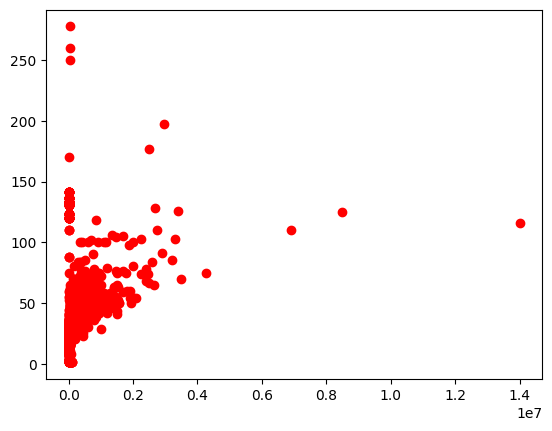

In [39]:
plt.scatter(df_clean['price'], df_clean['length_ft'], color = 'red')

In [110]:
# Remove record with 5,000,000 up ward
print('min price', df_clean['price'].min())
print('MAX Price', df_clean['price'].max())


min price 500.0
MAX Price 14000000.0


<Figure size 1700x900 with 0 Axes>

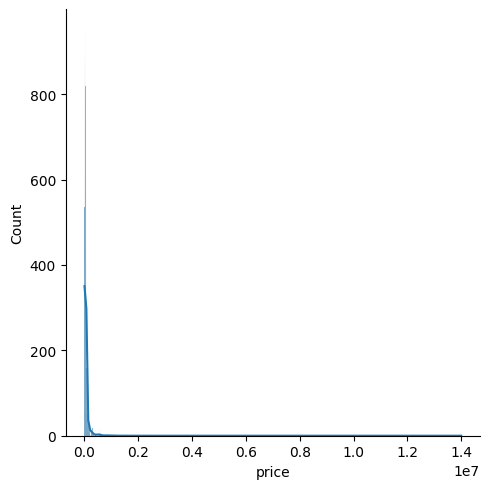

In [111]:
plt.figure(figsize=(17,9))
sns.displot(df_clean['price'], kde=True)


<Figure size 1700x900 with 0 Axes>

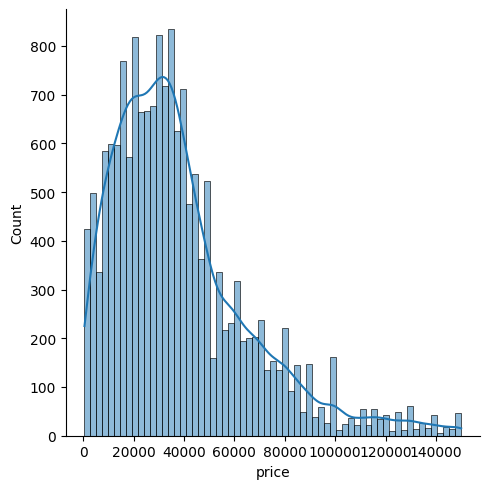

In [42]:
plt.figure(figsize=(17,9))
sns.displot(df_clean[(df_clean['price']<150000)]['price'], kde=True)

 REMOVE THE OUTLIER (SET MAX PRICE TO 150,000 )

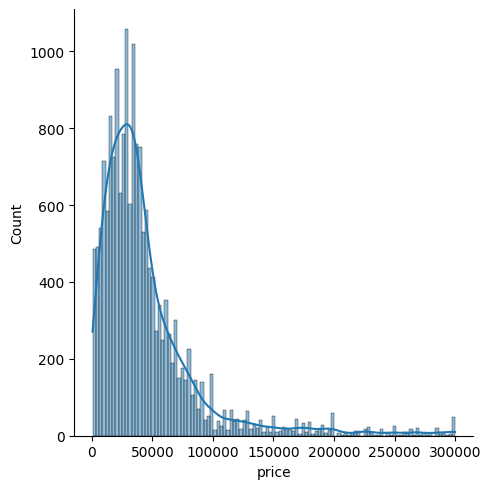

In [43]:
# Remove record with 5,000,000 up ward
#df_clean_outlier =df_clean[(df_clean['price'] < 5000000)] # 5m
#df_clean_outlier =df_clean[(df_clean['price'] < 2000000)] #2m
#df_clean_outlier =df_clean[(df_clean['price'] < 1000000)] #1m
#df_clean_outlier =df_clean[(df_clean['price'] < 999999)] #1m -1
#df_clean_outlier =df_clean[(df_clean['price'] < 500000)] #500k
#df_clean_outlier =df_clean[(df_clean['price'] < 400000)] #400k
df_clean_outlier = df_clean[(df_clean['price']<300000)] #300k
#df_clean_outlier = df_clean[(df_clean['price']<200000)] #200k
#df_clean_outlier = df_clean[(df_clean['price']<150000)] #150k
sns.displot(df_clean_outlier['price'], kde=True)


In [44]:
# Cross Check
print('min price', df_clean_outlier['price'].min())
print('MAX Price', df_clean_outlier['price'].max())
print('Lenght', df_clean_outlier.shape)
df_clean_outlier.sort_values('price', ascending=False).head(20)

min price 500.0
MAX Price 299999.0
Lenght (17575, 13)


,type,boatClass,year,condition,length_ft,hullMaterial,fuelType,numEngines,totalHP,price,sellerId,state,created_year
3339,power,power-house,2004,used,84.00,other,other,1,0.0,299999.0,29402,MO,2019
16160,power,power-cruiser,2015,used,38.50,fiberglass,gasoline,1,430.0,299995.0,35188,OH,2019
16383,power,power-cuddy,2018,used,33.00,fiberglass,gasoline,2,600.0,299995.0,14386,FL,2019
16531,power,power-cruiser,2017,new,36.00,fiberglass,gasoline,2,760.0,299948.0,14353,WI,2016
13209,power,power-center,2019,new,33.33,fiberglass,gasoline,2,0.0,299900.0,1176,VA,2018
13163,power,power-center,2019,new,33.33,fiberglass,gasoline,2,0.0,299900.0,1102,FL,2018
13169,power,power-center,2019,new,33.33,fiberglass,gasoline,2,0.0,299900.0,1107,NC,2018
13174,power,power-center,2019,new,33.33,fiberglass,gasoline,2,0.0,299900.0,1110,TX,2018
13179,power,power-center,2019,new,33.33,fiberglass,gasoline,2,0.0,299900.0,1114,TX,2018
17208,power,power-center,2018,used,29.00,fiberglass,gasoline,2,600.0,299900.0,6654,MA,2019


In [45]:
df_clean_outlier.info()


<class 'pandas.core.frame.DataFrame'>
Index: 17575 entries, 0 to 18902
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          17575 non-null  object 
 1   boatClass     17575 non-null  object 
 2   year          17575 non-null  int64  
 3   condition     17575 non-null  object 
 4   length_ft     17575 non-null  float64
 5   hullMaterial  17575 non-null  object 
 6   fuelType      17575 non-null  object 
 7   numEngines    17575 non-null  int64  
 8   totalHP       17575 non-null  float64
 9   price         17575 non-null  float64
 10  sellerId      17575 non-null  int64  
 11  state         17575 non-null  object 
 12  created_year  17575 non-null  int64  
dtypes: float64(3), int64(4), object(6)
memory usage: 1.9+ MB


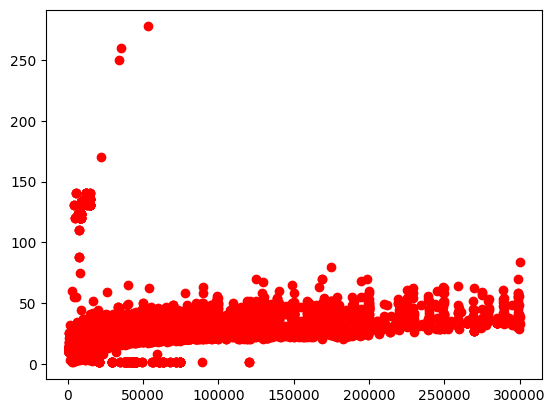

In [47]:
plt.scatter(df_clean_outlier['price'], df_clean_outlier['length_ft'], color = 'red')

CHECK FOR LENGHT_FT OUTLIER

In [48]:
print(df_clean_outlier['length_ft'].min())
df_clean_outlier['length_ft'].max()

1.0


277.9

REMOVE THE OUTLIER (SET MAX LENGHT_FT TO 100 )

In [49]:
df_clean_outlier =df_clean_outlier[(df_clean_outlier['length_ft'] < 70)]
print('min length_ft', df_clean_outlier['length_ft'].min())
print('MAX length_ft', df_clean_outlier['length_ft'].max())
print('Lenght', len(df_clean_outlier))
df_clean_outlier.sort_values('length_ft', ascending=False).head(20)


min length_ft 1.0
MAX length_ft 68.0
Lenght 17395


,type,boatClass,year,condition,length_ft,hullMaterial,fuelType,numEngines,totalHP,price,sellerId,state,created_year
14698,power,power-motor,1990,used,68.00,fiberglass,diesel,2,970.0,195000.0,18223,MD,2015
16625,power,power-house,1991,used,67.00,steel,gasoline,2,540.0,129900.0,56775,AZ,2018
11224,power,power-motor,1995,used,65.00,steel,diesel,2,574.0,149000.0,28309,TX,2018
12555,power,power-house,2014,new,65.00,aluminum,gasoline,2,440.0,39900.0,34439,AZ,2017
7563,power,power-motor,1991,used,64.00,fiberglass,other,1,0.0,259000.0,34373,PA,2017
12109,power,power-house,1978,used,63.00,aluminum,gasoline,2,330.0,89500.0,34888,KY,2019
15666,power,power-house,1999,used,63.00,aluminum,gasoline,1,140.0,166750.0,61430,WA,2012
13554,power,power-motor,1988,used,63.00,fiberglass,diesel,2,1300.0,249000.0,63935,FL,2017
5423,power,power-center,2019,new,62.50,fiberglass,gasoline,1,0.0,53837.0,35234,AL,2019
14017,power,power-flybridge,1999,used,62.00,aluminum,diesel,2,1400.0,250000.0,28311,MA,2017


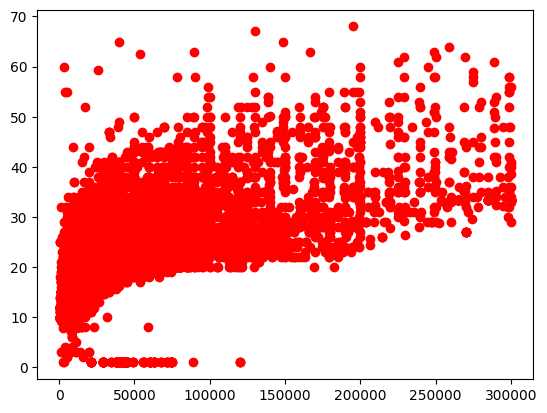

In [50]:
plt.scatter(df_clean_outlier['price'], df_clean_outlier['length_ft'], color = 'red')

In [51]:
df_clean_outlier[(df_clean_outlier['length_ft'] <= 2)]


,type,boatClass,year,condition,length_ft,hullMaterial,fuelType,numEngines,totalHP,price,sellerId,state,created_year
2286,power,power-pontoon,2020,new,1.0,other,other,1,0.0,45020.0,46516,MN,2019
2314,power,power-pontoon,2019,new,1.0,other,other,1,0.0,29352.0,46516,MN,2019
2315,power,power-pontoon,2020,new,1.0,other,other,1,0.0,45020.0,46516,MN,2019
2331,power,power-pontoon,2020,new,1.0,other,other,1,0.0,67690.0,46516,MN,2019
2340,power,power-pontoon,2018,new,1.0,other,other,1,0.0,37999.0,46516,MN,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10414,power,power-other,2016,used,2.0,other,gasoline,1,25.0,4899.0,57749,TX,2016
11275,power,power-other,2015,used,2.0,other,other,1,250.0,15995.0,1196,SC,2016
15438,power,power-other,2011,used,2.0,other,gasoline,1,150.0,4985.0,28292,FL,2017
16170,power,power-other,2015,used,1.0,other,gasoline,1,15.0,2750.0,5109,IL,2019


CHECK FOR NUMENGINES OUTLIER

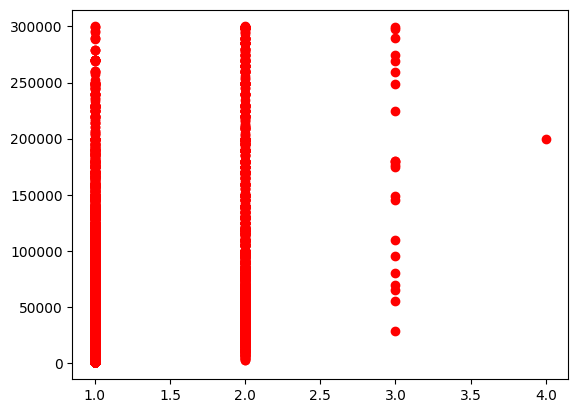

In [52]:
plt.scatter(df_clean_outlier['numEngines'], df_clean_outlier['price'], color = 'red')

REMOVE THE OUTLIER (SET MAX_NO OF NUMENGINES TO 2 )

In [53]:
df_clean_outlier = df_clean_outlier[df_clean_outlier['numEngines'] < 3]
df_clean_outlier

,type,boatClass,year,condition,length_ft,hullMaterial,fuelType,numEngines,totalHP,price,sellerId,state,created_year
0,power,power-center,1992,used,21.00,fiberglass,gasoline,1,150.0,16500.0,217053,FL,2019
2,power,power-deck,2020,new,18.00,fiberglass,gasoline,1,75.0,26995.0,220570,OH,2019
3,power,power-expresscruiser,2015,used,32.00,fiberglass,gasoline,2,600.0,169995.0,34834,SC,2019
4,power,power-aft,1994,used,44.00,fiberglass,diesel,2,700.0,109900.0,17942,MD,2018
9,power,power-convertible,1971,used,42.00,fiberglass,diesel,2,840.0,59500.0,16876,CT,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18894,power,power-pontoon,2017,new,22.33,aluminum,gasoline,1,90.0,37631.0,5103,MI,2016
18896,power,power-center,1990,used,28.00,fiberglass,diesel,1,315.0,49000.0,61420,FL,2019
18897,power,power-pilot,1973,used,29.00,other,gasoline,1,0.0,10000.0,32168,GA,2017
18899,power,power-runabout,2013,used,19.33,fiberglass,gasoline,1,0.0,26995.0,6335,MI,2019


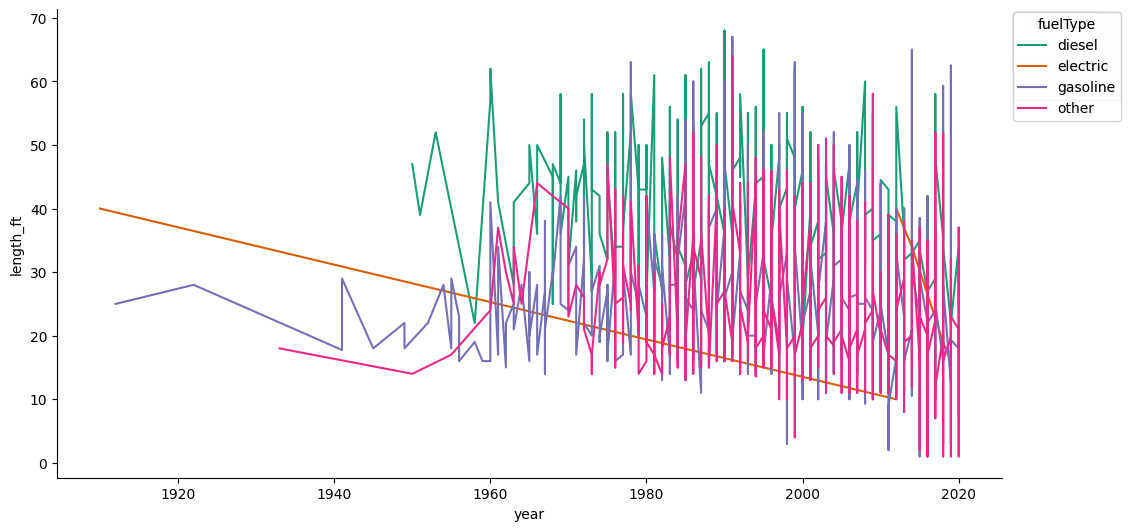

In [56]:
# @title year vs length_ft

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['length_ft']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_clean_outlier.sort_values('year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('fuelType')):
  _plot_series(series, series_name, i)
  fig.legend(title='fuelType', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('length_ft')

CHECK FOR TOTALHP OUTLIER

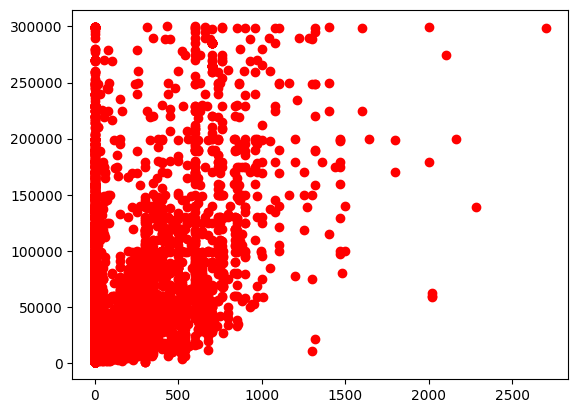

In [54]:
plt.scatter(df_clean_outlier['totalHP'], df_clean_outlier['price'], color = 'red')

In [55]:
print(df_clean_outlier['totalHP'].min())
df_clean_outlier['totalHP'].max()


0.0


2700.0

In [57]:
df_clean_outlier[(df_clean_outlier['totalHP'] < 400) & (df_clean_outlier['totalHP'] > -1)]


,type,boatClass,year,condition,length_ft,hullMaterial,fuelType,numEngines,totalHP,price,sellerId,state,created_year
0,power,power-center,1992,used,21.00,fiberglass,gasoline,1,150.0,16500.0,217053,FL,2019
2,power,power-deck,2020,new,18.00,fiberglass,gasoline,1,75.0,26995.0,220570,OH,2019
11,sail,sail-racercruiser,1986,used,30.00,fiberglass,diesel,1,0.0,25500.0,16876,CT,2011
12,power,power-pontoon,2019,new,23.70,aluminum,gasoline,1,200.0,44507.0,34914,DE,2019
13,power,power-motor,2000,used,55.00,fiberglass,diesel,2,0.0,299000.0,6123,FL,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18894,power,power-pontoon,2017,new,22.33,aluminum,gasoline,1,90.0,37631.0,5103,MI,2016
18896,power,power-center,1990,used,28.00,fiberglass,diesel,1,315.0,49000.0,61420,FL,2019
18897,power,power-pilot,1973,used,29.00,other,gasoline,1,0.0,10000.0,32168,GA,2017
18899,power,power-runabout,2013,used,19.33,fiberglass,gasoline,1,0.0,26995.0,6335,MI,2019


 REMOVE THE OUTLIER (SET MAX_NO OF TOTALHP TO 399 and MIN_NO TO 0)

In [58]:
df_clean_outlier =df_clean_outlier[(df_clean_outlier['totalHP'] < 400) & (df_clean_outlier['totalHP'] > -1)]
print('min totalHP', df_clean_outlier['totalHP'].min())
print('MAX totalHP', df_clean_outlier['totalHP'].max())
print('Lenght', len(df_clean_outlier))
df_clean_outlier.sort_values('totalHP', ascending=False).head(10)


min totalHP 0.0
MAX totalHP 385.0
Lenght 16383


,type,boatClass,year,condition,length_ft,hullMaterial,fuelType,numEngines,totalHP,price,sellerId,state,created_year
17088,power,power-runabout,2005,used,28.67,fiberglass,gasoline,1,385.0,31900.0,5913,NJ,2019
11181,power,power-sportcruiser,1996,used,28.00,fiberglass,gasoline,2,380.0,23500.0,16863,NY,2018
18821,power,power-bowrider,2015,used,28.00,fiberglass,gasoline,1,380.0,94800.0,67460,FL,2019
12782,power,power-bowrider,2013,used,27.00,fiberglass,gasoline,1,380.0,84500.0,17929,NJ,2019
70,power,power-skiwake,2015,used,24.50,fiberglass,gasoline,1,380.0,84900.0,34745,MO,2019
12886,power,power-bowrider,2018,new,27.00,fiberglass,gasoline,1,380.0,179999.0,42094,MD,2017
15556,power,power-cruiser,1998,used,29.00,fiberglass,gasoline,2,380.0,33900.0,21445,NY,2019
14400,power,power-skiwake,2019,new,27.00,fiberglass,gasoline,1,380.0,199685.0,223836,WI,2018
18818,power,power-other,2017,used,28.00,fiberglass,gasoline,1,380.0,147900.0,44163,CT,2019
18561,power,power-highperf,1998,used,24.00,fiberglass,gasoline,1,380.0,21000.0,27207,TN,2019


Start coding or generate with AI.

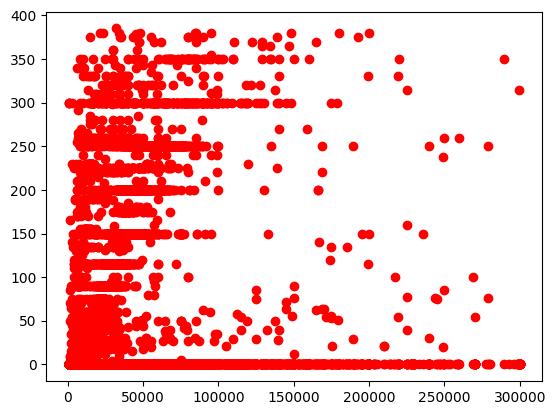

In [59]:
plt.scatter(df_clean_outlier['price'], df_clean_outlier['totalHP'], color = 'red')


In [ ]:
#plt.scatter(df_clean_outlier['year'], df_clean_outlier['price'], color = 'red')


In [ ]:
#sns.pairplot(df_clean_outlier)
#plt.figure(figsize=(12,5))
#sns.heatmap(train.isnull(), yticklabels=False, cbar =True, cmap='viridis')


<Figure size 1400x700 with 0 Axes>

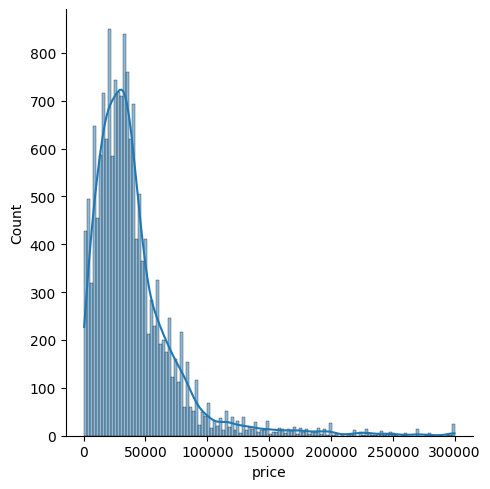

In [61]:
plt.figure(figsize=(14,7))
sns.displot(df_clean_outlier['price'], kde=True)

In [62]:
df_clean_outlier

,type,boatClass,year,condition,length_ft,hullMaterial,fuelType,numEngines,totalHP,price,sellerId,state,created_year
0,power,power-center,1992,used,21.00,fiberglass,gasoline,1,150.0,16500.0,217053,FL,2019
2,power,power-deck,2020,new,18.00,fiberglass,gasoline,1,75.0,26995.0,220570,OH,2019
11,sail,sail-racercruiser,1986,used,30.00,fiberglass,diesel,1,0.0,25500.0,16876,CT,2011
12,power,power-pontoon,2019,new,23.70,aluminum,gasoline,1,200.0,44507.0,34914,DE,2019
13,power,power-motor,2000,used,55.00,fiberglass,diesel,2,0.0,299000.0,6123,FL,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18894,power,power-pontoon,2017,new,22.33,aluminum,gasoline,1,90.0,37631.0,5103,MI,2016
18896,power,power-center,1990,used,28.00,fiberglass,diesel,1,315.0,49000.0,61420,FL,2019
18897,power,power-pilot,1973,used,29.00,other,gasoline,1,0.0,10000.0,32168,GA,2017
18899,power,power-runabout,2013,used,19.33,fiberglass,gasoline,1,0.0,26995.0,6335,MI,2019


<ipython-input-64-42f2feb6504f>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




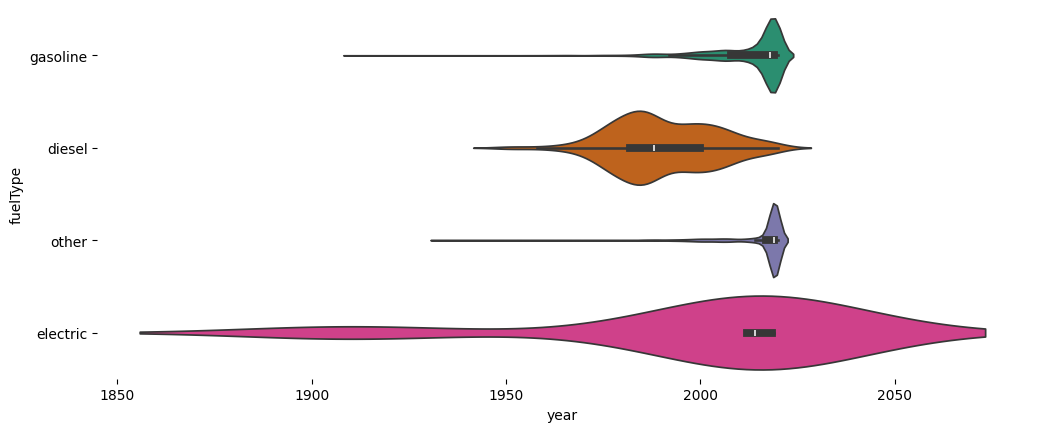

In [64]:
# @title fuelType vs year

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_clean_outlier['fuelType'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_clean_outlier, x='year', y='fuelType', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
#sns.jointplot( x='fico', y='int.rate', data=df,)


In [63]:
#plt.figure(figsize=(11,7))
#sns.lmplot(y='int.rate',x='fico',data=df_clean_outlier, hue='credit.policy',
# col='not.fully.paid', palette='Set1')


### TRANSFORMATION

In [ ]:
#from sklearn.compose import ColumnTransformer
#from sklearn.preprocessing import OneHotEncoder

In [ ]:
#ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder, [0,3,5,6])], remainder='passthrough')
#ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,3,5,6])], remainder='passthrough')
#df_clean_outlier_transform = ct.fit_transform(df_clean_outlier)
#X = np.array(ct.fit_transform(X))


DIMENSIONAL REDUCTION

In [65]:
from sklearn.decomposition import PCA

In [67]:
# to select the number of n_component
for col in df_clean_outlier:
  if df[col].dtypes == 'object':
    print(col)

type
boatClass
condition
hullMaterial
fuelType
state


In [70]:
# Check for Object type column, get there dummies values, reduce there demensionality to 1,
df_transformed_pca = pd.DataFrame()
for col in df_clean_outlier:
  # Check for obj type
  if df[col].dtypes == 'object':
    dummy_val = pd.get_dummies(df_clean_outlier[col])
    # Reduce the demension to 1
    pca = PCA(n_components=1)
    pca_value = pca.fit_transform(dummy_val)
    pca_value = pd.DataFrame(pca_value, columns=[col+'_pca']) # Convert the numpy data to DataFrame series
    df_transformed_pca = pd.concat([df_transformed_pca, pca_value], axis=1) # Add to existing df
df_transformed_pca

,type_pca,boatClass_pca,condition_pca,hullMaterial_pca,fuelType_pca,state_pca
0,-0.017634,-0.257808,0.907935,0.750177,0.979046,0.877958
1,-0.017634,-0.234319,-0.506279,0.750177,0.979046,-0.083854
2,1.395879,-0.185880,0.907935,0.750177,0.291670,-0.080133
3,-0.017634,0.781600,-0.506279,-0.443088,0.979046,-0.074592
4,-0.017634,-0.189224,0.907935,0.750177,0.291670,0.877958
...,...,...,...,...,...,...
16378,-0.017634,0.781600,-0.506279,-0.443088,0.979046,-0.243734
16379,-0.017634,-0.257808,0.907935,0.750177,0.291670,0.877958
16380,-0.017634,-0.185179,0.907935,-0.503787,0.979046,-0.103048
16381,-0.017634,-0.203617,0.907935,0.750177,0.979046,-0.243734


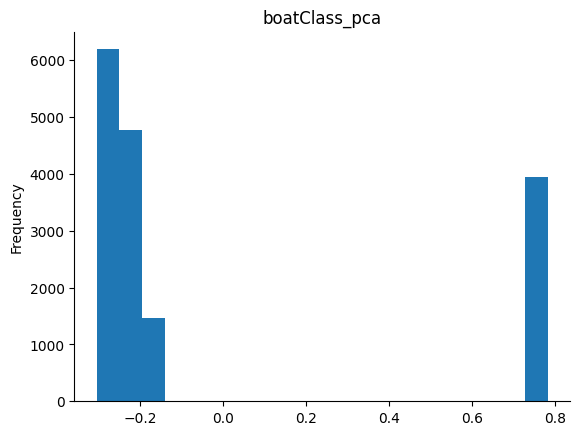

In [72]:
# @title boatClass_pca

from matplotlib import pyplot as plt
df_transformed_pca['boatClass_pca'].plot(kind='hist', bins=20, title='boatClass_pca')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [78]:
# Set the index of df_transformed_pca to match the index of df_clean_outlier
df_transformed_pca.index = df_clean_outlier.index


In [71]:
df_transformed_pca.tail(3)


,type_pca,boatClass_pca,condition_pca,hullMaterial_pca,fuelType_pca,state_pca
16380,-0.017634,-0.185179,0.907935,-0.503787,0.979046,-0.103048
16381,-0.017634,-0.203617,0.907935,0.750177,0.979046,-0.243734
16382,-0.017634,-0.254576,-0.506279,0.750177,0.979046,-0.103048


In [73]:
df_clean_outlier_transformed = pd.concat([df_clean_outlier, df_transformed_pca ], axis=1)
df_clean_outlier_transformed.drop(['type', 'condition', 'hullMaterial', 'fuelType', 'boatClass', 'state'], axis=1, inplace=True)
df_clean_outlier_transformed

,year,length_ft,numEngines,totalHP,price,sellerId,created_year,type_pca,boatClass_pca,condition_pca,hullMaterial_pca,fuelType_pca,state_pca
0,1992.0,21.0,1.0,150.0,16500.0,217053.0,2019.0,-0.017634,-0.257808,0.907935,0.750177,0.979046,0.877958
2,2020.0,18.0,1.0,75.0,26995.0,220570.0,2019.0,1.395879,-0.185880,0.907935,0.750177,0.291670,-0.080133
11,1986.0,30.0,1.0,0.0,25500.0,16876.0,2011.0,-0.017634,-0.191938,0.907935,0.750177,0.979046,-0.076612
12,2019.0,23.7,1.0,200.0,44507.0,34914.0,2019.0,-0.017634,-0.257808,0.907935,0.750177,0.979046,0.877958
13,2000.0,55.0,2.0,0.0,299000.0,6123.0,2013.0,-0.017634,-0.257808,0.907935,0.750177,0.979046,0.877958
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.017634,-0.245554,0.907935,-0.443088,0.979046,-0.283342
16373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.395879,-0.189285,0.907935,0.750177,0.291670,0.877958
16374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.017634,-0.245554,0.907935,-0.503787,-0.434986,-0.157308
16377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.017634,-0.203617,0.907935,0.750177,0.979046,0.877958


# MODEL AND EVALUATION

Splitting the dataset into the Training set and Test set

In [74]:
df_clean_outlier_transformed.shape

(18195, 13)

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X = df_clean_outlier_transformed.drop('price', axis=1)
y = df_clean_outlier_transformed['price']

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Train using Linear Regression

In [113]:
from sklearn.linear_model import LinearRegression

ln_regressor = LinearRegression()
ln_regressor.fit(X_train, y_train)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [114]:
ln_predictions = ln_regressor.predict(X_test)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values